Plotting stress-strain curves is a useful skill in mechanical engineering because it allows us to derive mechanical properties of materials such as tensile strength, elastic modulus, yield strength and ductility. Plotting stress strain curves can be accomplished with Excel and MATLAB, but what about plotting stress strain curves with Python? Follow along to find out.

We will use **Python**, **matplotlib**, **pandas**, **holoviews** and **scipy**  to build the bar plot.  I recommend undergraduate engineers use the [**Anaconda**](https://www.anaconda.com/download/) distribution of **Python**, which comes with **matplotlib**, **pandas**, , and **scipy** already installed. For help installing Anaconda, see a previous blog post: [Installing Anaconda on Windows 10](http://pythonforundergradengineers.com/installing-anaconda-on-windows.html). If  **matplotlib**, **pandas**, **holoviews**, and **scipy** are not available in your version of **Python**, open a terminal or the **Anaconda Prompt** and type:


```
$ pip install matplotlib
$ pip install pandas
$ pip install holoviews
$ pip install scipy
```

or 

```
> conda install matplotlib
> conda install pandas
> conda install holoviews
> conda install scipy

```

The data we are going to plot is stored in two Microsoft Excel Files. You can download the sample data here (clicking link will start the download):

[Al_6061.xls](https://github.com/ProfessorKazarinoff/staticsite/raw/master/content/code/matplotlib_plots/Al_6061.xls)

We'll use **pandas** to load the data into the notebook.

Note that when I first tried to run the ```pd.read_excel()``` function, I was returned an error:


```python
ImportError: Install xlrd >= 0.9.0 for Excel support
```

To solve this, I went to the **Anaconda Prompt** and typed:

```
> conda install xlrd
```

Once the **xlrd** module was installed, the ```pd.read_excel()``` function worked just fine.

To start the Jupyter notebook, we need to import the required packages:

**pandas**
**numpy**
**matplotlib**
**scipy**

The ```%matplotlib inline``` magic command is add so that we can see our plots right in the **jupyter notebook**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

In [2]:
dfa=pd.read_excel('Al_6061.xls')
pd.options.display.max_rows = 999
dfa

,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,703,1,7.373,0.07306,201.788025,0.277029,-52.170364,NaN,NaN,NaN
1,703,2,7.581,0.07382,210.158737,0.000466,-52.167755,NaN,NaN,NaN
2,703,3,8.778,0.07826,260.129089,0.002002,-52.165543,NaN,NaN,NaN
3,703,4,9.879,0.08290,313.650208,0.003473,-52.167255,NaN,NaN,NaN
4,703,5,10.778,0.08672,366.283081,0.006554,-52.166386,NaN,NaN,NaN
5,703,6,11.479,0.08946,418.915558,0.009250,-52.165379,NaN,NaN,NaN
6,703,7,11.882,0.09138,483.722656,0.011572,-52.167137,NaN,NaN,NaN
7,703,8,12.378,0.09332,534.705505,0.014460,-52.167999,NaN,NaN,NaN
8,703,9,12.875,0.09562,595.326294,0.017394,-52.171307,NaN,NaN,NaN
9,703,10,13.375,0.09756,647.195984,0.019679,-52.169579,NaN,NaN,NaN


We have a couple columns in our pandas dataframe. The columns of interest are **FORCE** and **EXT**. The **FORCE** column conntians the force values in units of pounds (lb). The **EXT** column contains the extension or strain in units of %. So line 215 of our dataframe shows a force = 8206.19283 lb and an extension or strain of 3.003093% which is the same as a strain of 0.03003093 in/in (unitless strain rather than % strain).

To convert the **FORCE** column to stress $\sigma$, we need to divide the force $F$ (in lb) by the cross-sectional area $A_0$ of the sample.

$$ \sigma = \frac{F}{A_0} $$

The cross-sectional area of the sample $A_0$ is the $\pi r^2$. Since we measured the diameter of the sample, and diamter $d$ is equal to two times the radius $r$

$$ A_0 = \pi (\frac{d}{2})^2 $$

In our case diamter $d = 0.506 \ in$

In [3]:
d = 0.506 #units: in
A0 = np.pi*(d/2)**2  #units: in^2
stress_Al = dfa['FORCE'][1:172]*(1/A0)*(0.001)
strain_Al = dfa['EXT'][1:172]*0.01

l0 = 2.0 #units: in
lf = 2.24 #units: in
strain_Al_f = (lf-l0)/l0 #units: in/in

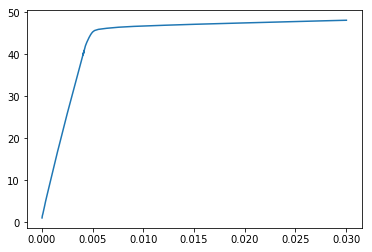

In [4]:
plt.plot(strain_Al, stress_Al)
plt.show()

To zoom in on the elastic region, we'll do something a little fancy, we'll spin up a **bokeh** plot using ***holoviews***.

In [5]:
import holoviews as hv
hv.extension('bokeh')
import bokeh

ModuleNotFoundError: No module named 'holoviews'

In [6]:
hv.Curve((strain_Al, stress_Al),'strain (in/in)','stress (ksi)')

NameError: name 'hv' is not defined

From this plot of force vs. extension, we can zoom into the linear region. It looks like the linear elastic region is from 1.5 ksi to 39.5 ksi. Pandas has this nice little method ```.between()```. We can set lower and upper limits from the stress series and then use this to index out of both the stress and the strain series in the linear elastic region.

In [7]:
E_stress = stress_Al[stress_Al.between(1.5,39.5)]
E_strain = strain_Al[stress_Al.between(1.5,39.5)]
E_strain

3      0.000035
4      0.000066
5      0.000093
6      0.000116
7      0.000145
8      0.000174
9      0.000197
10     0.000223
11     0.000246
12     0.000268
13     0.000294
14     0.000316
15     0.000342
16     0.000370
17     0.000394
18     0.000422
19     0.000446
20     0.000476
21     0.000500
22     0.000529
23     0.000555
24     0.000582
25     0.000613
26     0.000641
27     0.000668
28     0.000694
29     0.000721
30     0.000749
31     0.000778
32     0.000815
33     0.000845
34     0.000872
35     0.000902
36     0.000931
37     0.000961
38     0.000991
39     0.001021
40     0.001043
41     0.001078
42     0.001106
43     0.001138
44     0.001168
45     0.001192
46     0.001232
47     0.001257
48     0.001282
49     0.001308
50     0.001345
51     0.001370
52     0.001397
53     0.001424
54     0.001453
55     0.001482
56     0.001509
57     0.001538
58     0.001570
59     0.001597
60     0.001628
61     0.001660
62     0.001691
63     0.001722
64     0.001751
65     0

Now we'll use **scipy's** linear regression function called ```linregress()```

In [8]:
res = linregress(E_strain, E_stress)
res

LinregressResult(slope=9554.613114858443, intercept=1.8422409352006461, rvalue=0.9996858660482589, pvalue=5.401839678530501e-202, stderr=21.4255942038523)

We see the ```slope = 9554.61 ksi```. The ```rvalue = 0.999685``` is very close to 1, so the linear elastic region is in fact pretty linear, not _perfectly linear_, but pretty close. Let's make a new variable ```E_Al``` for the elastic modulus of Aluminum

In [9]:
E_Al = res[0]
E_Al

9554.613114858443

Now we will add a 0.002 or 0.2 % offset line to our plot. We will create a new series using the general form:

$$ y = mx + b $$
$$ \sigma_{offset} = E (\epsilon - 0.002) $$ 

In [10]:
stress_offset = E_Al*(strain_Al - 0.002)

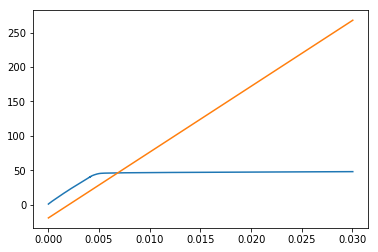

In [11]:
plt.plot(strain_Al, stress_Al, strain_Al, stress_offset)
plt.show()

We can use holoviews again to zoom into the intersection point

In [12]:
curve = hv.Curve((strain_Al, stress_Al),'strain (in/in)','stress (ksi)')
offset_curve = hv.Curve((strain_Al, stress_offset),'strain (in/in)','stress (ksi)')
curve * offset_curve

NameError: name 'hv' is not defined

If we use the zoom box, we can clearly see the two lines cross at $\sigma_y = 46.2795 \ ksi$. This compares well to a published value of around 40 ksi. Let's set a variable for our yield strength

In [13]:
sigma_y = 46.2795

But what if we want to find this programatically, rather than by zooming into a plotted curve. Let's look at the points with holoviews

In [14]:
scatter = hv.Scatter((strain_Al, stress_Al),'strain (in/in)','stress (ksi)')
offset_scatter = hv.Scatter((strain_Al, stress_offset),'strain (in/in)','stress (ksi)')
scatter * offset_scatter

NameError: name 'hv' is not defined

We need to find the two points on the blue stress strain curve where the crossover happens, and we need to find the the two red offset curve points where the crossover happens. Then we can do a little algebra and find the crossover point.

In [15]:
for i in range(2, len(strain_Al)):
    if stress_offset[i] > stress_Al[i]:
        sx1 = strain_Al[i-1]
        sy1 = stress_Al[i-1]
        sy2 = stress_Al[i]
        sx2 = strain_Al[i]
        ox1 = strain_Al[i-1]
        oy1 = stress_offset[i-1]
        ox2 = strain_Al[i]
        oy2 = stress_offset[i]
        break

print(sy1)
print(sy2)
print(sx2)
print(ox1)
print(oy1)
print(ox2)
print(oy2)

46.180053791959466
46.4338704275076
0.007562094330787659
0.00638077974319458
41.856655587633135
0.007562094330787659
53.14365943902356
